In [15]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn import linear_model
import seaborn as sns

In [16]:
df = pd.read_csv("irrigation_plan.csv")
df

,Crop,Days,Moisture,Temperature,Humidity,Irrigation
0,Wheat,10,400,30,15,0
1,Wheat,7,200,30,32,0
2,Wheat,9,300,21,28,0
3,Wheat,3,500,40,22,0
4,Wheat,2,700,23,34,0
...,...,...,...,...,...,...
496,Coffee,93,675,25,19,1
497,Coffee,95,210,23,17,0
498,Coffee,97,398,25,18,0
499,Coffee,99,678,24,18,1


In [17]:
X = df.drop(['Irrigation'], axis='columns')
y = df['Irrigation']

In [245]:
label_encoder = LabelEncoder()
X['Crop'] = label_encoder.fit_transform(X['Crop'])

y = to_categorical(y, 2)

In [246]:
display(X, X.shape)
display(y, y.shape)

,Crop,Days,Moisture,Temperature,Humidity
0,8,10,400,30,15
1,8,7,200,30,32
2,8,9,300,21,28
3,8,3,500,40,22
4,8,2,700,23,34
...,...,...,...,...,...
496,0,93,675,25,19
497,0,95,210,23,17
498,0,97,398,25,18
499,0,99,678,24,18


(501, 5)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

(501, 2)

In [247]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [248]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [249]:
model = Sequential()
model.add(Input(shape=(len(X.columns),)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(2, kernel_initializer="uniform", activation='softmax'))

In [250]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [252]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.1557333916425705
Test accuracy: 0.9210526347160339


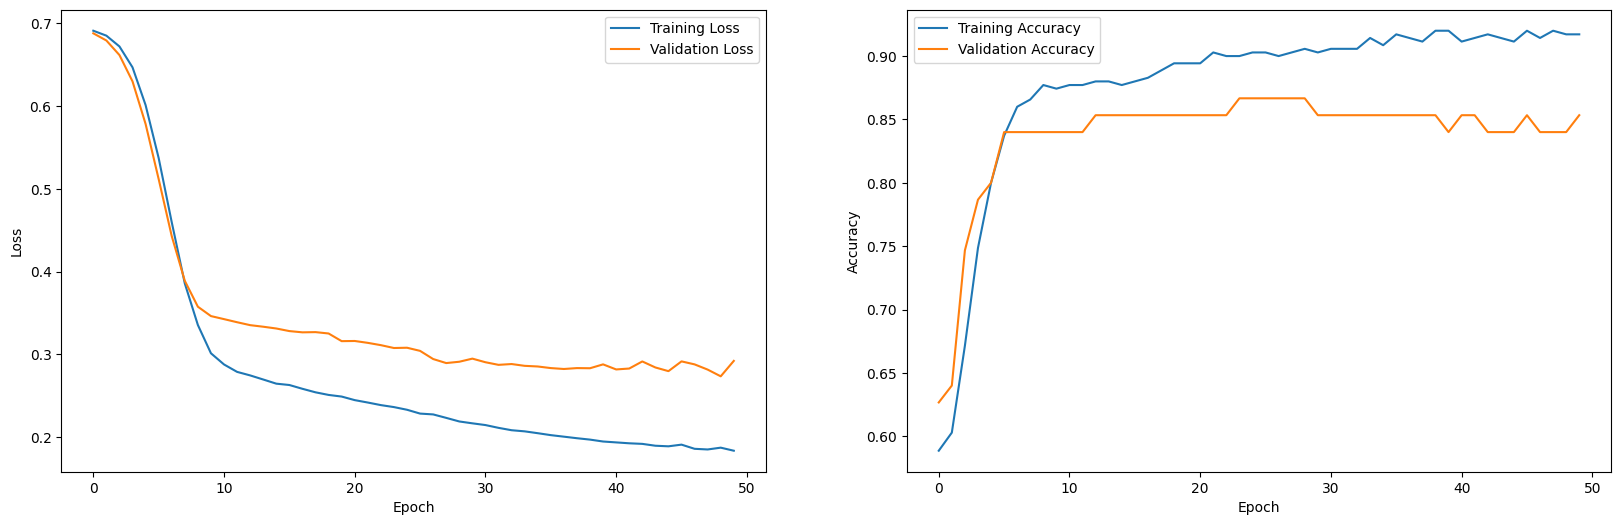

In [253]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# analysing dataset

In [92]:
df = pd.read_csv("../datasets/weather_data.csv")
df

,Time,Rainfall,Humidity,Temperature
0,0,0.00,82,22.5
1,1,0.00,82,22.3
2,2,0.00,81,22.2
3,3,0.00,83,22.0
4,4,0.00,85,21.8
...,...,...,...,...
715,19,0.00,68,24.5
716,20,0.01,72,23.7
717,21,0.06,75,23.2
718,22,0.00,77,23.0


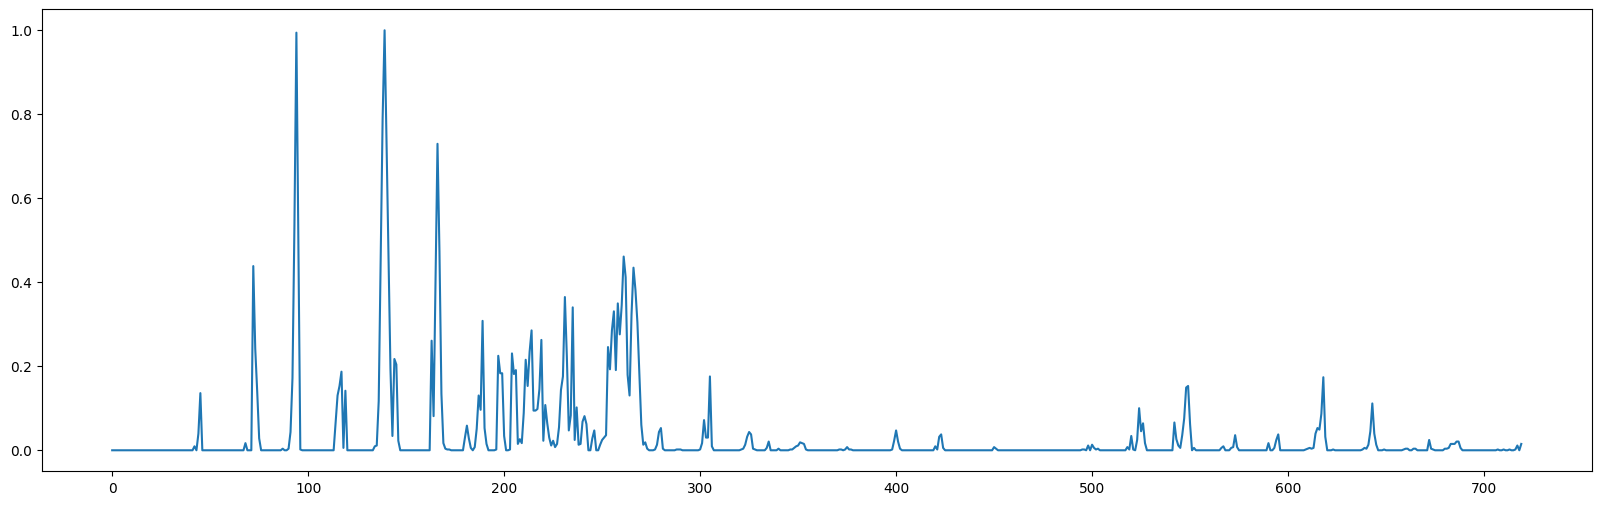

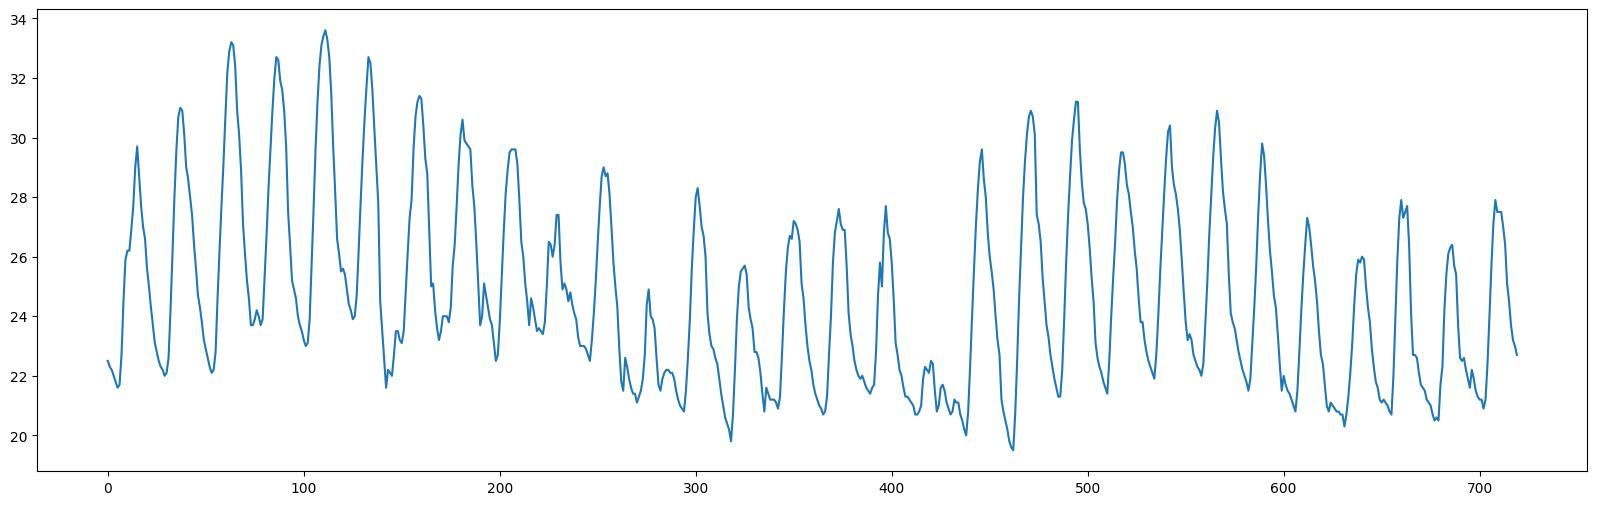

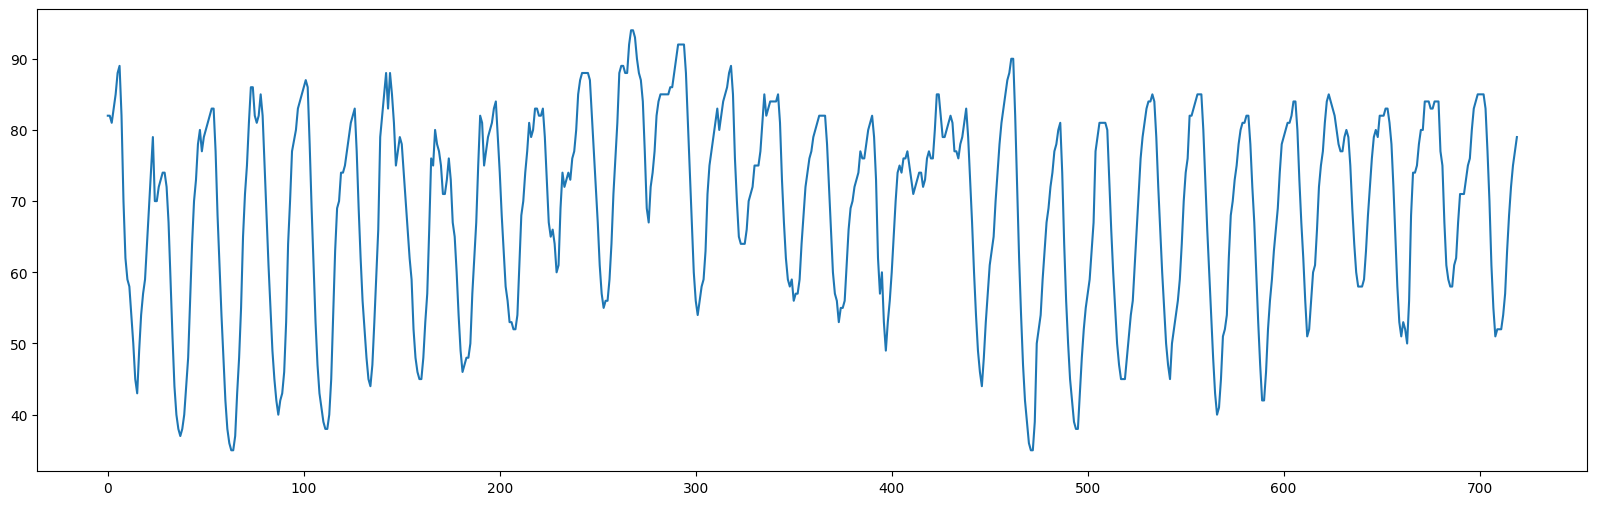

In [85]:
df = df[df['Rainfall'] <= 6]

x = df.index
y = df['Rainfall']

y = (y - y.min()) / (y.max() - y.min())

plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.show()

y = df['Temperature']
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.show()

y = df['Humidity']
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.show()

In [95]:
X = df[['Temperature','Humidity','Time']]
y = df['Rainfall']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Variance score: {}'.format(regr.score(X, y)))

x = regr.predict(X)

mean_squared_error(x,y) 


Variance score: 0.08575818146868375


1.7665597467400587

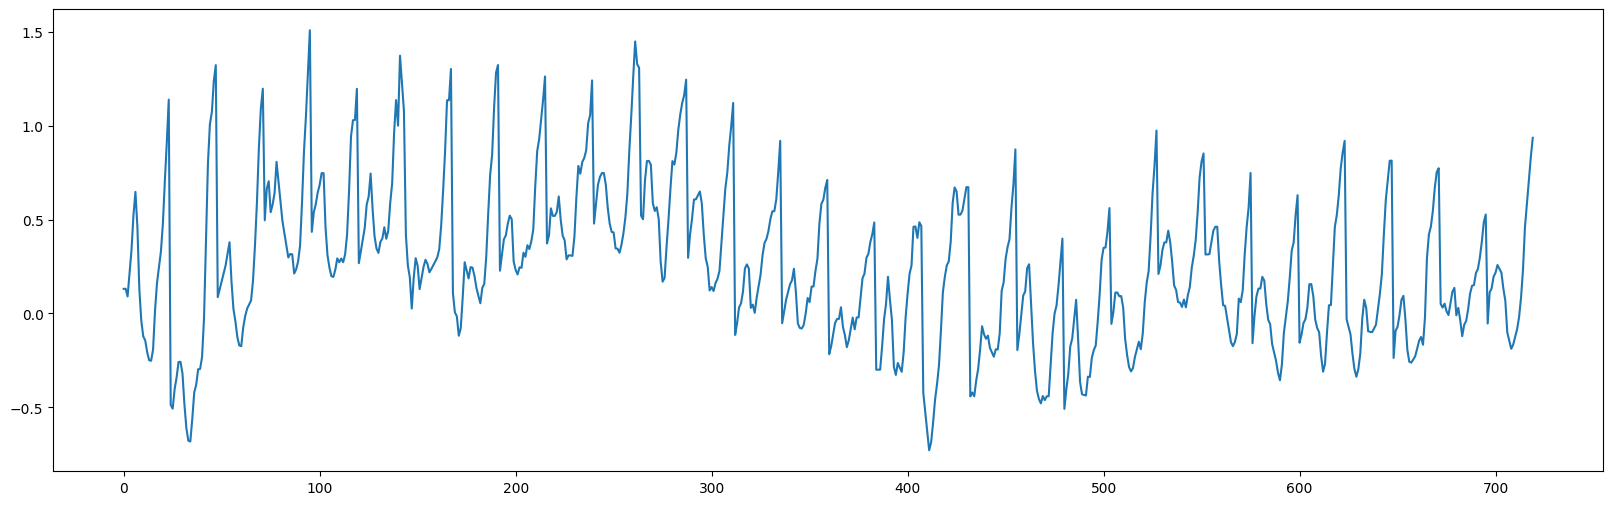

In [96]:
y = df.index
plt.figure(figsize=(20, 6))
plt.plot(y, x)
plt.show()

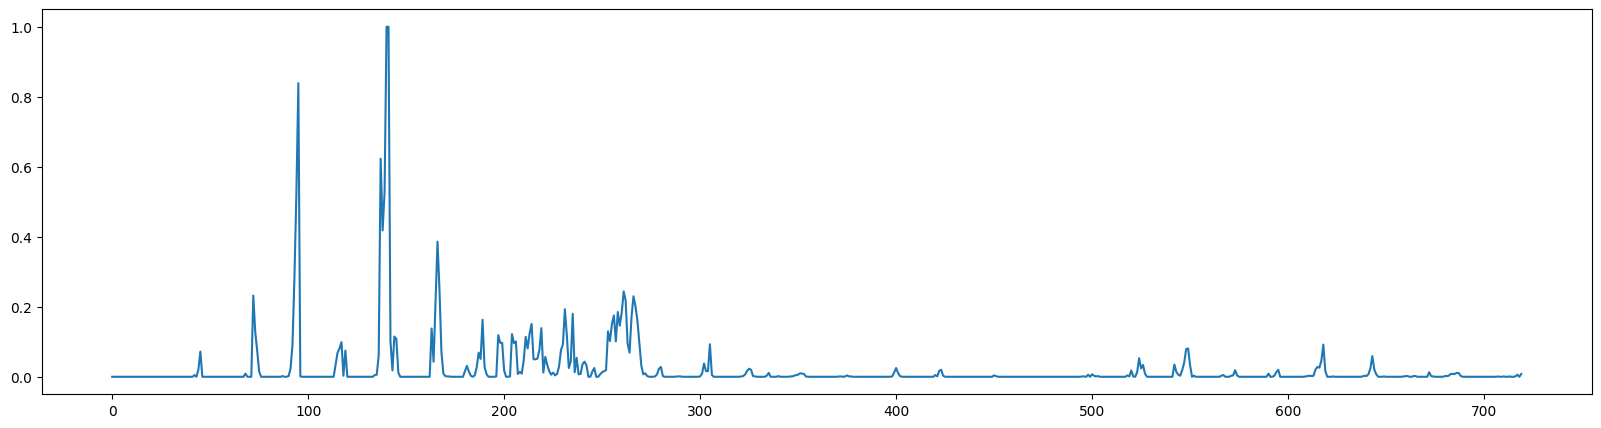

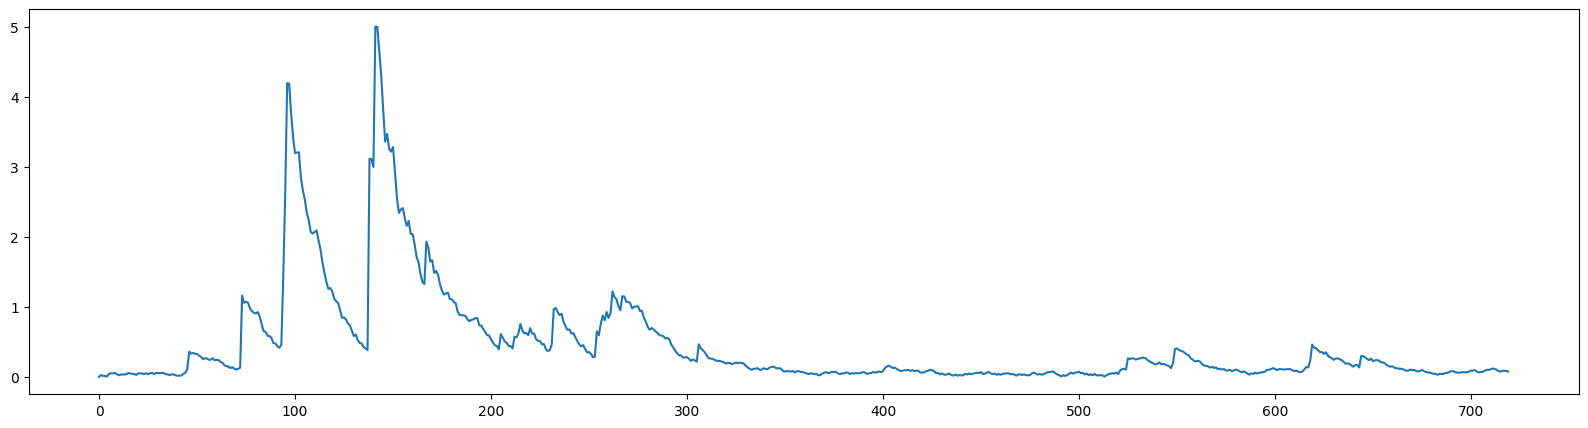

In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


def generate_soil_moisture(rainfall, min_moisture=0):
    
    soil_moisture = []
    soil_moisture.append(0)

    for rain in rainfall:
        
        decay_rate = 0.05 + random.uniform(-0.08, 0.08)
        current_moisture = max(min_moisture + random.uniform(0, 0.05), soil_moisture[-1] * np.exp(-decay_rate) + random.uniform(-0.02, 0.02), 5 * rain)
        soil_moisture.append(current_moisture)
    
    return soil_moisture[:-1]


# Example usage
df = pd.read_csv("weather_data.csv")
# df = df[df['Rainfall'] <= 6]
df.loc[df['Rainfall'] > 10, 'Rainfall'] = 10
rainfall = df['Rainfall']
rainfall = (rainfall - rainfall.min()) / (rainfall.max() - rainfall.min())
soil_moisture = generate_soil_moisture(rainfall)

# for i in range(len(soil_moisture)):
#     print(i,soil_moisture[i])

x = df.index
y = rainfall
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.show()
x = df.index
y = soil_moisture
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.show()

In [13]:
soil_moisture = [round(num, 2) for num in soil_moisture]
df['Moisture'] = soil_moisture
df

,Time,Rainfall,Humidity,Temperature,Moisture
0,2024-05-27 00:00,0.00,82,22.5,0.00
1,2024-05-27 01:00,0.00,82,22.3,0.02
2,2024-05-27 02:00,0.00,81,22.2,0.01
3,2024-05-27 03:00,0.00,83,22.0,0.01
4,2024-05-27 04:00,0.00,85,21.8,0.00
...,...,...,...,...,...
715,2024-06-25 19:00,0.00,68,24.5,0.07
716,2024-06-25 20:00,0.01,72,23.7,0.09
717,2024-06-25 21:00,0.06,75,23.2,0.09
718,2024-06-25 22:00,0.00,77,23.0,0.08


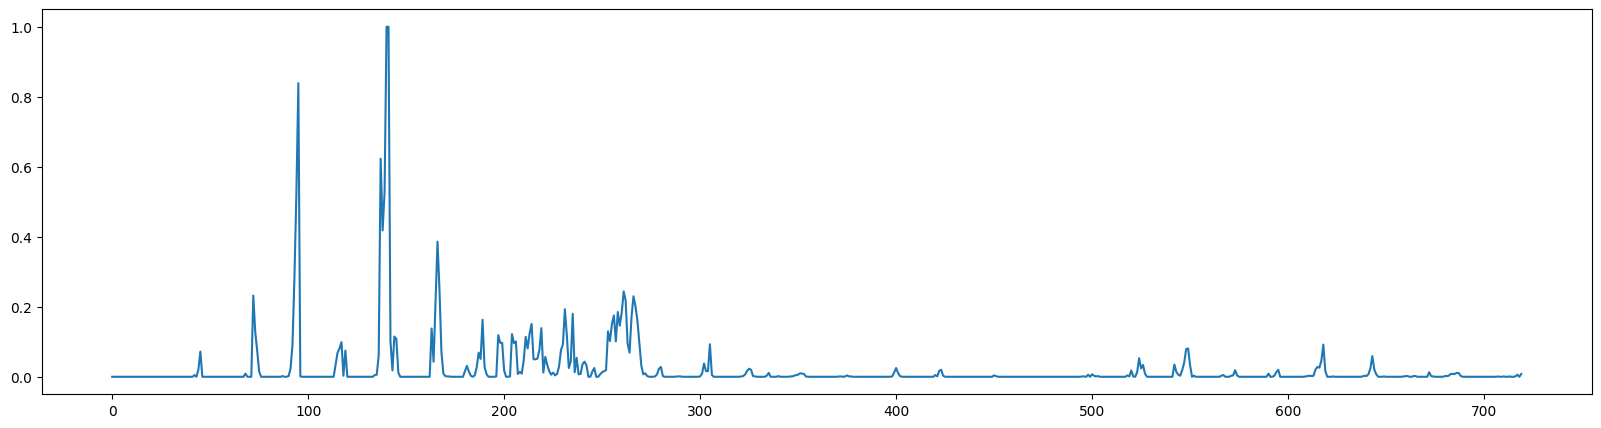

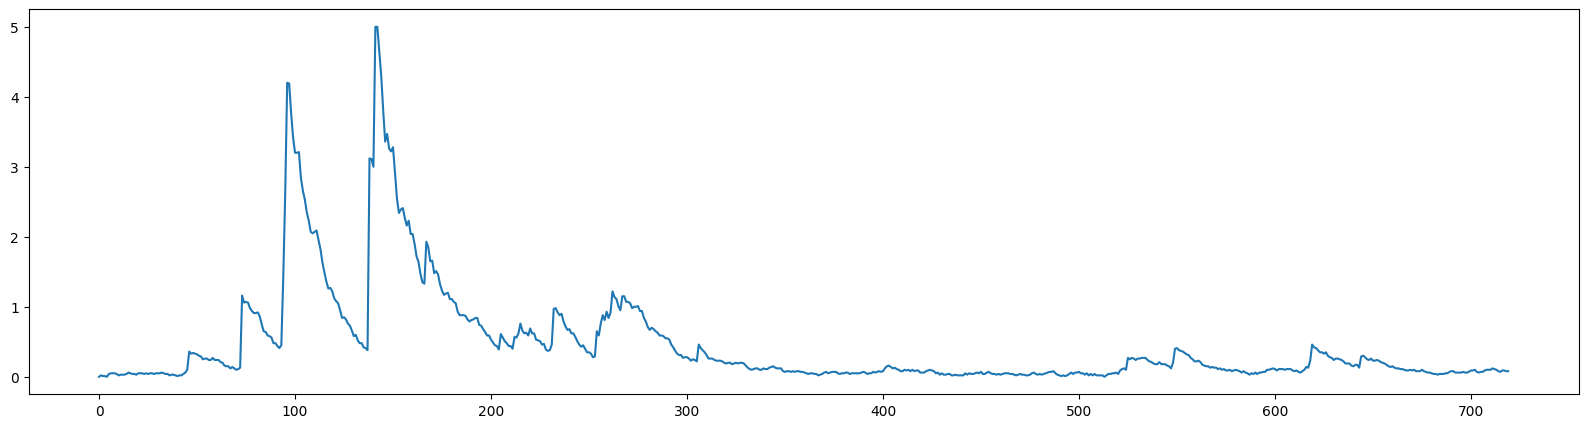

In [14]:

x = df.index
y = rainfall
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.show()
x = df.index
y = soil_moisture
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.show()